(400, 400)
Train accuracy for gaussian kernel: 0.5, gamma: 10, lambda: 1e-4
(400, 400)
Train accuracy for gaussian kernel: 0.46, gamma: 0.1, lambda: 1e-4
(400, 400)
Train accuracy for gaussian kernel: 0.25, gamma: 0.001, lambda: 1e-4


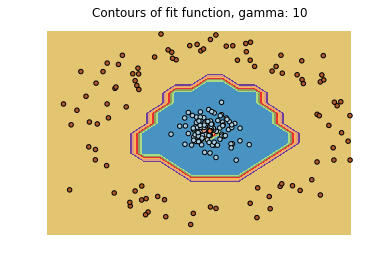

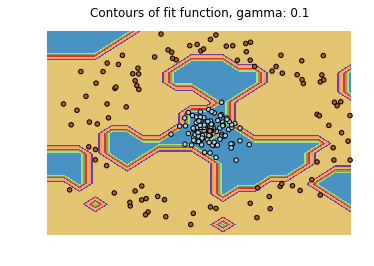

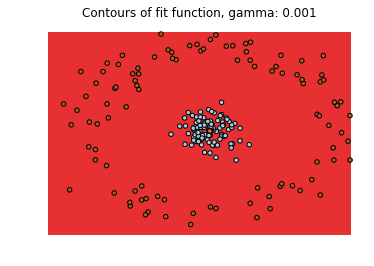

In [4]:
import csv
import math
import numpy as np
import sklearn.metrics as metrics
import scipy
import scipy.io
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab

from __future__ import division
from sklearn.feature_extraction import DictVectorizer
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import normalize
from sklearn.preprocessing import Imputer
from scipy.spatial.distance import pdist, squareform
from scipy import stats
from matplotlib  import cm
%matplotlib inline
# 1
# 1.1
NUM_CLASSES = 2
def gen_Xlabels():
    X = np.zeros((400,2))
    Y = np.zeros((400,1))
    for i in range(200):
        a = np.random.normal(0, 1, 2)
        w_1, w_2 = a[0], a[1]
        theta = np.random.uniform(0, 2* math.pi, 1)
        x_1 = 8 * np.cos(theta) + w_1
        x_2 = 8 * np.sin(theta) + w_2
        X[i,0], X[i,1] = x_1, x_2
        Y[i,0] = 1


    for i in range(100,200):
        a = np.random.normal(0, 1, 2)
        w_1, w_2 = a[0], a[1]
        X[i,0], X[i,1] = w_1, w_2
        Y[i,0] = -1
    return X, Y

def plot(X, y):
    plt.figure()
    #plt.scatter(X[:100,0], X[:100,1])
    plt.title("Datapoints for class y=1 (red), y=-1 (blue)")
    plt.scatter(X[:,0], X[:,1], c=y)
    plt.show()
# http://stackoverflow.com/questions/19054923/plot-decision-boundary-matplotlib  
# https://piazza.com/class/is83id8c49m5at?cid=544
def plot_decision(a, X, y, gamma=None):
    h = 1
    title = ""
    plt.figure()
    # X - some data in 2dimensional np.array
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))

    # here "model" is your model's prediction (classification) function
    Xtest = np.c_[xx.ravel(), yy.ravel()]
    if gamma:
        Kprime = gauss_kern(Xtest, X, gamma)
        title = "Contours of fit function, gamma: " + str(gamma)
    else:
        Kprime = poly_kern(Xtest, X) #np.zeros((Xtest.shape[0], X.shape[0]))
        title = "Decision boundary, lambda: 1e-6"
    #print (X.shape, Xtest.shape, Kprime.shape)

    Z = predict(a, Kprime)

    # Put the result into a color plot
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, cmap=plt.cm.Paired)
    plt.axis('off')
    plt.title(title)
    # Plot also the training points
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Paired)

def one_hot(labels_train):
    '''Convert categorical labels -1,1 to standard basis vectors in R^{2} '''
    onehot = np.zeros((labels_train.shape[0],2))
    for i in range(onehot.shape[0]):
        if labels_train[i] == -1:
            onehot[i,0] = 1
        else:
            onehot[i,1] = 1
    return onehot

# polynomial kernel
def poly_kern(X, Z):
    # a kernel grows with the number of examples
    return (1 + X.dot(Z.T))**2

# gaussian kernel
# http://stackoverflow.com/questions/29731726/how-to-calculate-a-gaussian-kernel-matrix-efficiently-in-numpy
def gauss_kern(X, Z, gamma):
    K = np.zeros((X.shape[0], Z.shape[0]))
    for i in range(X.shape[0]):
        for j in range(Z.shape[0]):
            K[i,j] = np.exp(-gamma * np.linalg.norm(X[i]-Z[j])  **2)
    return K

def train(K, y, reg):
    return scipy.linalg.solve(K + reg*np.eye(K.shape[0]), y)#, sym_pos=True)
    
def predict(a, K):
    ''' From model and data points, output prediction vectors '''
    pred = np.argmax(K.dot(a), axis=1)
    pred[pred == 0] = -1
    return pred
# 1.2
# X, labels = gen_Xlabels()
# y = one_hot(labels)
# # 1.2
# plot(X, labels)
# polyK = poly_kern(X, X)
# print polyK.shape

# polya = train(polyK, y, 1e-6)
# poly_pred_labels = predict(polya, polyK)
# print("Train accuracy for polynomial kernel: {}, lambda: 1e-6".format(metrics.accuracy_score(labels, poly_pred_labels)))
# plot_decision(polya, X, labels)

# 1.3
gammas = [10, .1, .001]
for gamma in gammas:
    gaussK = gauss_kern(X, X, gamma)
    print gaussK.shape
    gaussa = train(gaussK, y, 1e-4)
    gauss_pred_labels = predict(gaussa, gaussK)
    print("Train accuracy for gaussian kernel: {}, gamma: {}, lambda: 1e-4".format(metrics.accuracy_score(labels, gauss_pred_labels), gamma))
    plot_decision(gaussa, X, labels, gamma)